In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, confusion_matrix
import speech_recognition as sr
import joblib

# Load your labeled SMS dataset
data = pd.read_csv('data/sms.csv')  # Replace with your dataset path

# Preprocessing: Clean and preprocess the text
# Feature Extraction: TF-IDF vectorization
vectorizer = joblib.load('audioTfidfVectorizer3.sav')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Define and train the Support Vector Machine classifier
svm_classifier = joblib.load('audiomodel2.sav')
# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Function to convert audio to text and make predictions
def process_audio(audio_path, classifier, vectorizer):
    try:
        # Initialize the recognizer
        recognizer = sr.Recognizer()

        # Recognize the audio using the Google Web Speech API
        with sr.AudioFile(audio_path) as source:
            audio = recognizer.record(source)
        transcribed_text = recognizer.recognize_google(audio)

        # Preprocess the transcribed text (clean and preprocess)
        preprocessed_text = preprocess_text(transcribed_text)

        # Vectorize the preprocessed text using TF-IDF
        text_vector = vectorizer.transform([preprocessed_text])

        # Make predictions using the trained classifier
        prediction = classifier.predict(text_vector)

        # Return the prediction
        return prediction[0]
    except Exception as e:
        print(f"Error processing audio: {str(e)}")
        return None

# Function to preprocess text (you can customize this based on your needs)
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove leading and trailing whitespaces
    text = text.strip()
    
    # Add more preprocessing steps as needed, such as removing punctuation or special characters
    return text

# Example usage
audio_file_path = 'data/spam.wav'  # Replace with the path to your audio file

# Predict using the Multinomial Naive Bayes classifier
predicted_label_nb = process_audio(audio_file_path, nb_classifier, vectorizer)
if predicted_label_nb == 1:
    print(f"Predicted Label (Multinomial Naive Bayes): spam")
else:
    print(f"Predicted Label (Multinomial Naive Bayes): not spam")

# Predict using the Support Vector Machine classifier
predicted_label_svm = process_audio(audio_file_path, svm_classifier, vectorizer)
if predicted_label_svm == 1:
    print(f"Predicted Label (Support Vector Machine): spam")
else:
    print(f"Predicted Label (Support Vector Machine): not spam")

# Predict using the Random Forest classifier
predicted_label_rf = process_audio(audio_file_path, rf_classifier, vectorizer)
if predicted_label_rf == 1:
    print(f"Predicted Label (Random Forest): spam")
else:
    print(f"Predicted Label (Random Forest): not spam")

# Evaluate each classifier on the test data
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics for each classifier
print("Multinomial Naive Bayes - Accuracy:", accuracy_nb)
print("Multinomial Naive Bayes - Precision:", precision_nb)
print("Multinomial Naive Bayes - F1 Score:", f1_nb)

print("\nSupport Vector Machine - Accuracy:", accuracy_svm)
print("Support Vector Machine - Precision:", precision_svm)
print("Support Vector Machine - F1 Score:", f1_svm)

print("\nRandom Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - F1 Score:", f1_rf)


Predicted Label (Multinomial Naive Bayes): spam
Predicted Label (Support Vector Machine): spam
Predicted Label (Random Forest): spam
Multinomial Naive Bayes - Accuracy: 0.979372197309417
Multinomial Naive Bayes - Precision: 0.9726027397260274
Multinomial Naive Bayes - F1 Score: 0.9250814332247557

Support Vector Machine - Accuracy: 0.9856502242152466
Support Vector Machine - Precision: 0.9931972789115646
Support Vector Machine - F1 Score: 0.9480519480519481

Random Forest - Accuracy: 0.9829596412556054
Random Forest - Precision: 0.9797297297297297
Random Forest - F1 Score: 0.9385113268608415


In [2]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


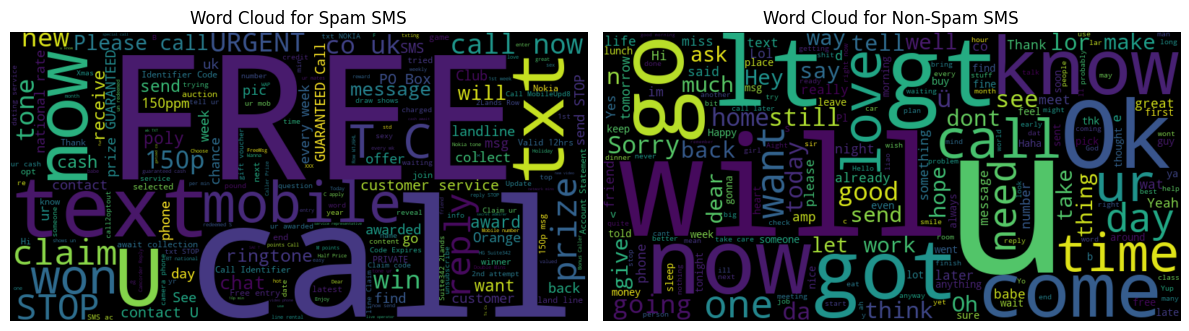

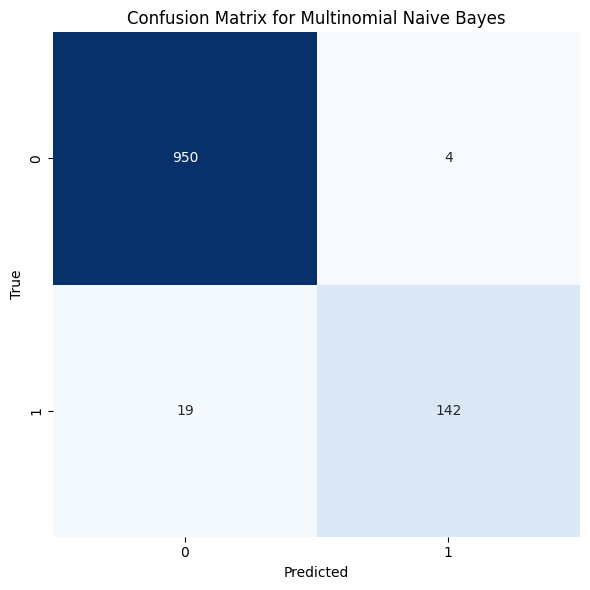

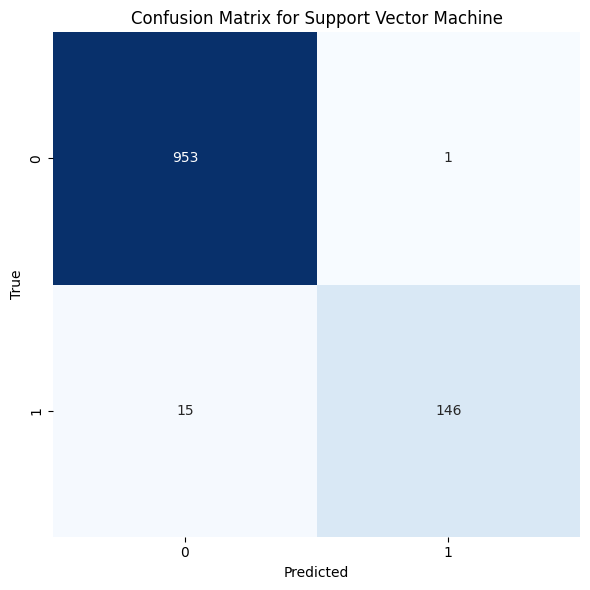

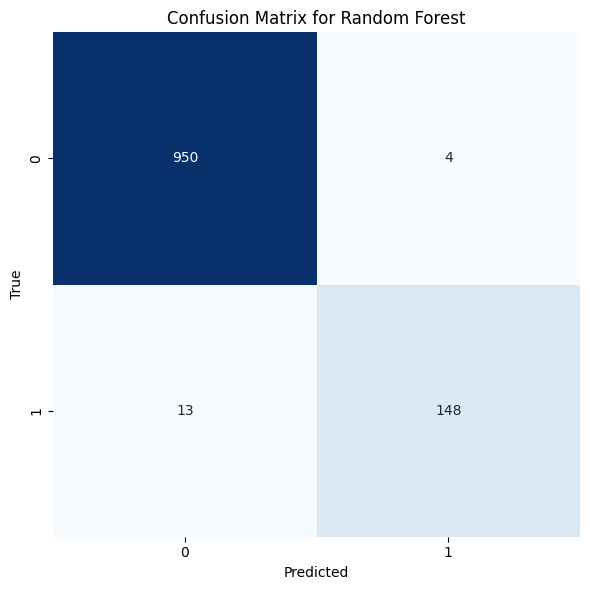

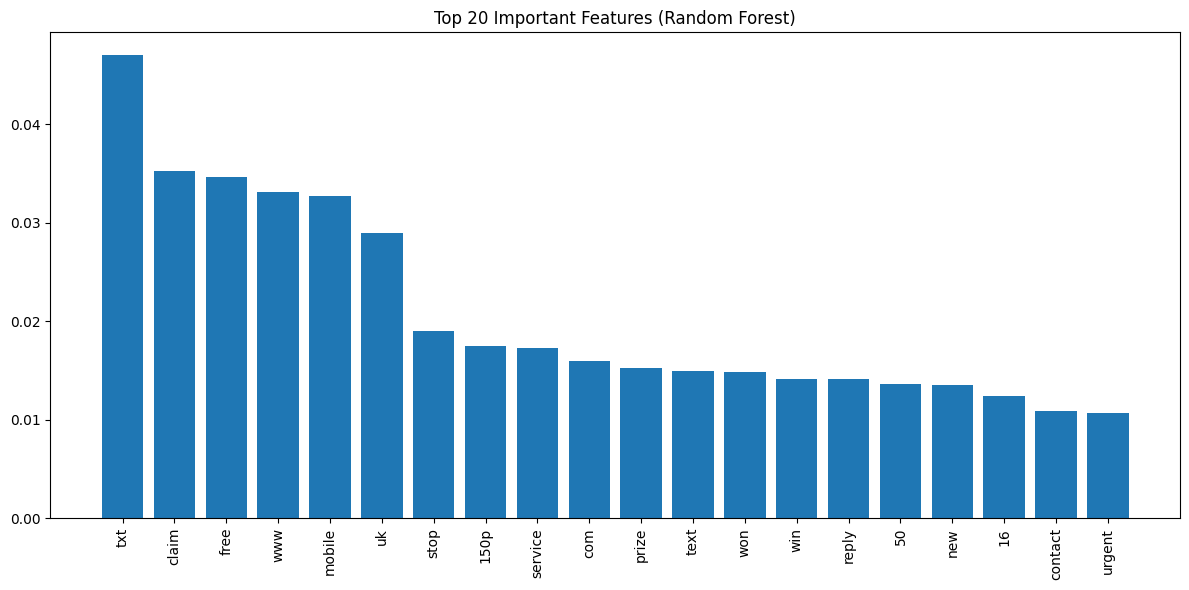

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Create word clouds for labels
spam_sms_text = ' '.join(data[data['label'] == 1]['sms'])
non_spam_sms_text = ' '.join(data[data['label'] == 0]['sms'])

# Generate word clouds
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_sms_text)
non_spam_wordcloud = WordCloud(width=800, height=400).generate(non_spam_sms_text)

# Plot the word clouds for labels
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam SMS')
plt.axis("off")

plt.subplot(122)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam SMS')
plt.axis("off")

plt.tight_layout()
plt.show()

# Visualize confusion matrices for the classifiers
classifiers = {
    'Multinomial Naive Bayes': nb_classifier,
    'Support Vector Machine': svm_classifier,
    'Random Forest': rf_classifier
}

for clf_name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Analyze feature importance with a Random Forest classifier
feature_importances = rf_classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the top N important features
top_n = 20
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), sorted_feature_importances[:top_n], tick_label=sorted_feature_names[:top_n])
plt.title('Top {} Important Features (Random Forest)'.format(top_n))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()